# Run the GP optimizer in four dimensions

In [1]:
%run -i ../../../examples/prepare_gp_optimizer.py

dofs = [kbv.x_rot, kbv.offz, kbh.x_rot, kbh.offz]

hard_bounds = np.array([[-0.10, +0.10], [-0.50, +0.50], [-0.10, +0.10], [-0.50, +0.50]])

for dof in dofs:
    dof.kind = "hinted"

In [2]:
gpo = Optimizer(
    init_scheme='quasi-random', 
    n_init=16, 
    run_engine=RE, 
    db=db, 
    detector=w9, 
    detector_type='image',
    dofs=dofs, 
    dof_bounds=hard_bounds, 
    fitness_model='max_sep_density',
    training_iter=100, 
    verbose=True,
)

learning with strategy "quasi-random" ...


getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array


getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array


    kbv_x_rot  kbv_offz  kbh_x_rot  kbh_offz    fitness
0    0.049173  0.033861  -0.063106 -0.002693   6.850121
1   -0.050827 -0.410583   0.040894  0.425878   7.423845
2    0.099173  0.256083   0.080894 -0.329224        NaN
3   -0.000827 -0.077250   0.000894 -0.472081  12.283869
4    0.024173 -0.188361  -0.039106 -0.186367   7.696738
5   -0.075827  0.478306  -0.079106  0.099348   6.121496
6    0.074173  0.144972   0.048894  0.242205   6.771411
7   -0.025827 -0.336509   0.088894 -0.043510   5.861907
8    0.036673  0.330157   0.008894  0.385062   9.878487
9   -0.063327 -0.003176  -0.031106 -0.247591   8.215944
10   0.086673 -0.447620  -0.071106 -0.390448        NaN
11  -0.013327  0.219046   0.032894 -0.104734   7.860700
12   0.011673 -0.114287   0.072894  0.180980   6.070416
13  -0.088327 -0.225398  -0.007106  0.323837  10.721223
14   0.061673  0.441268  -0.047106  0.038123        NaN
15  -0.038327  0.107935  -0.087106  0.466694   7.153045


With four dimensions, we can no longer plot the parameter space in a satisfying way as we might be able to in two dimensions. We also have a lot more hyperparameters to deal with, and comparatively fewer points per dimension with which to infer them. One way to evaluate the state of the hyperparameters is with the Fisher information matrix, which encodes the covariance of their estimates with respect to the likelihood:

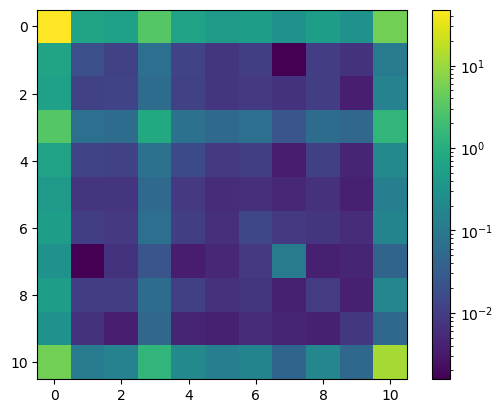

In [3]:
FM = gpo._contingent_fisher_information_matrix(gpo.test_params[0])[0]
plt.imshow(np.abs(FM), norm=mpl.colors.LogNorm())
plt.colorbar()

In particular, we can use the information matrix to sample points which will tell us the most about the hyperparameters:

In [4]:
gpo.learn(n_iter=1, n_per_iter=1, strategy='A-optimal', greedy=True, reuse_hypers=False)
gpo.learn(n_iter=1, n_per_iter=1, strategy='D-optimal', greedy=True, reuse_hypers=False)

learning with strategy "A-optimal" ...


getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array


getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array


    kbv_x_rot  kbv_offz  kbh_x_rot  kbh_offz  fitness
16   0.090177  0.485807  -0.053862 -0.057836      NaN
learning with strategy "D-optimal" ...


    kbv_x_rot  kbv_offz  kbh_x_rot  kbh_offz   fitness
17   0.002598  0.297873   0.029445 -0.057602  8.012808


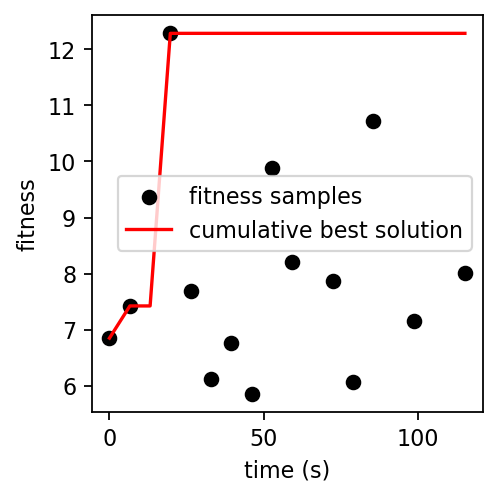

In [5]:
gpo.plot_fitness()